# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV 

import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import yfinance as yf # Yahoo Finance API

# Load Dataset

In [2]:
df = pd.read_csv(r"C:\Users\phana\Downloads\GAS_dropna.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-05-21,30833.333984,34250.000000,30833.333984,34166.667969,32736.435547,3002495.0
1,2012-05-22,35833.332031,35833.332031,35416.667969,35833.332031,34333.332031,5801459.0
2,2012-05-23,35750.000000,35833.332031,34083.332031,34083.332031,32656.587891,1266935.0
3,2012-05-24,32500.000000,33333.332031,32416.666016,32416.666016,31059.689453,1211255.0
4,2012-05-25,32416.666016,33166.667969,30916.666016,32500.000000,31139.535156,1112711.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2995 entries, 0 to 2994
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2995 non-null   object 
 1   Open       2995 non-null   float64
 2   High       2995 non-null   float64
 3   Low        2995 non-null   float64
 4   Close      2995 non-null   float64
 5   Adj Close  2995 non-null   float64
 6   Volume     2995 non-null   float64
dtypes: float64(6), object(1)
memory usage: 163.9+ KB


In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2995.000000,2995.000000,2995.000000,2995.000000,2995.000000,2.995000e+03
mean,67903.210926,68805.870847,67006.494177,67841.925494,65201.792916,7.466401e+05
std,19986.100735,20319.653187,19638.559923,19956.876283,19255.518968,6.176388e+05
min,25083.333984,25583.333984,24833.333984,25000.000000,23953.488281,3.311000e+03
25%,52500.000000,52916.667969,51666.667969,52500.000000,50302.324219,3.482690e+05
50%,71583.335938,72250.000000,70500.000000,71500.000000,68506.976563,6.015470e+05
75%,84916.664063,85833.335938,83750.000000,84583.335938,81362.015625,9.596270e+05
max,113416.664063,113666.664063,110833.335938,113416.664063,108668.992188,1.076186e+07


# Data Cleaning

In [6]:
df.drop(['Adj Close'], axis=1, inplace=True)

In [7]:
df = df.dropna()

# Data Visualisation

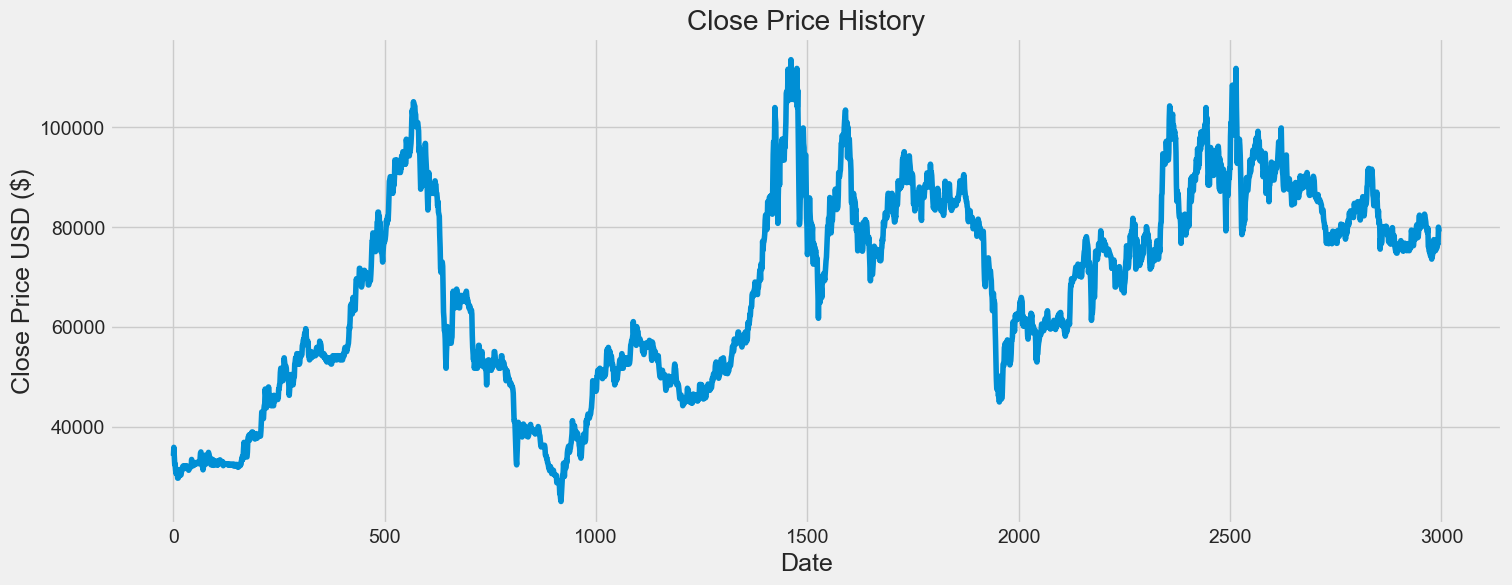

In [8]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

# Manipulate Data

In [9]:
# Create a new dataframe
datax = df.filter(['High', 'Low', 'Open', 'Volume'])
datay = df.filter(['Close'])
# Convert the dataframe to a numpy array
datasetx = datax.values
datasety = datay.values

In [10]:
#scaler = MinMaxScaler(feature_range=(0,5))
scaler = StandardScaler()
scaled_x = scaler.fit_transform(datasetx)
scaled_y = scaler.fit_transform(datasety)

# Convert the numpy array to a pandas DataFrame
scaledx = pd.DataFrame(scaled_x)
scaledy = pd.DataFrame(scaled_y)
# Optionally, you can assign column names to the DataFrame
# For example, if you have 5 columns, you can assign names as follows:
scaledx.columns = ['High', 'Low', 'Open', 'Volume']
scaledy.columns = ['Close']

# Create Dataset

In [11]:
X = scaledx 
y = scaledy 

X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size=0.2, random_state=0) 
print(X_train.shape) 
print(X_test.shape) 
print(y_train.shape) 
print(y_test.shape) 

(2396, 4)
(599, 4)
(2396, 1)
(599, 1)


# Build The Model

+ Use Grid Search to find the best parameter to train the model

In [12]:
svr = SVR() 

param_grid = {'C': [0.1, 1, 10, 100,1000],  
              'gamma': [1, 0.1, 0.01, 0.001,0.0001], 
              'kernel': ['rbf']}   

grid = GridSearchCV(SVR(), param_grid, refit=True, verbose= 0)   
grid.fit(X_train, y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [13]:
grid.best_estimator_

SVR(C=1000, gamma=0.0001)

+ Run the model with the chosen parameters

In [14]:
svr_model = SVR(C = 1000, kernel = 'rbf', gamma = 0.0001)
svr_model.fit(X_train, y_train)

SVR(C=1000, gamma=0.0001)

# Evaluate Model

In [15]:
predictions_scaled = svr_model.predict(X_test)
predictions_scaled = predictions_scaled.reshape(-1,1)

predictions_train = svr_model.predict(X_train)
predictions_train = predictions_train.reshape(-1,1)

In [16]:
predictions = scaler.inverse_transform(predictions_scaled)
predictions_train = scaler.inverse_transform(predictions_train)
y_test = scaler.inverse_transform(y_test)
y_train = scaler.inverse_transform(y_train)

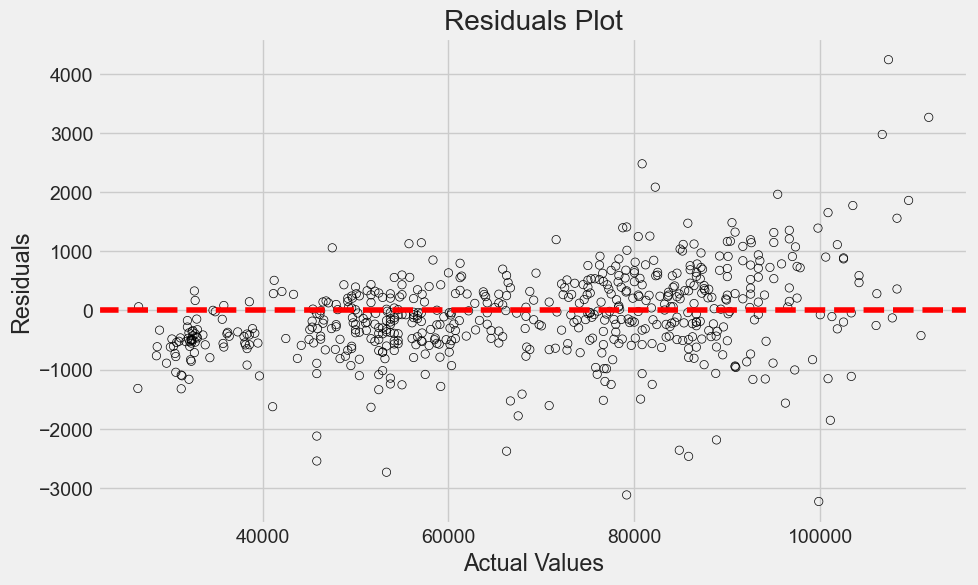

In [17]:
# Calculate residuals
residuals = y_test - predictions

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, edgecolors='k', facecolors='none')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

In [18]:
column_names_pred = ['Close_predict']
df_predictions = pd.DataFrame(predictions, columns=column_names_pred)

df_test = pd.DataFrame(y_test)

concatenated = np.concatenate([df_predictions, df_test], axis=1)
column_names_concat = ['Close_predict', 'Close_test']
df_concatenated = pd.DataFrame(concatenated, columns = column_names_concat)

df_test.reset_index(drop=True, inplace=True)

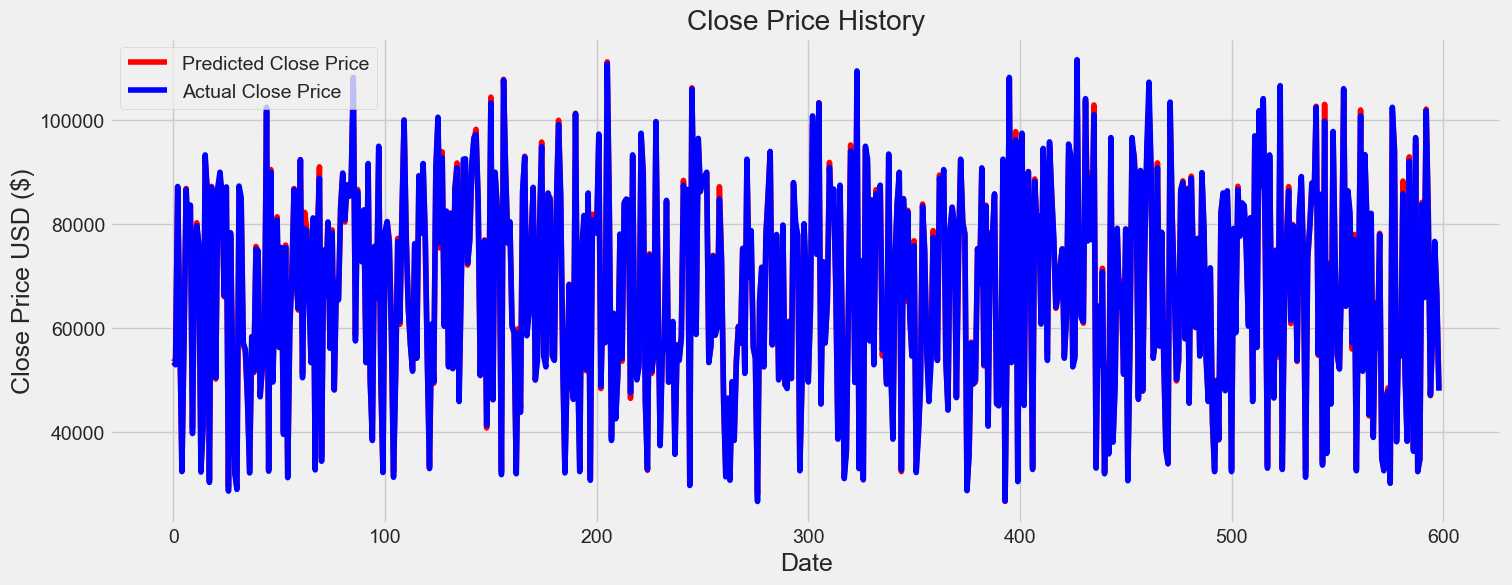

In [19]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df_predictions['Close_predict'], color='red', label='Predicted Close Price')
plt.plot(df_test, color='blue', label='Actual Close Price')
plt.legend()
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [20]:
mae_train = mean_absolute_error(y_train, predictions_train)
rmse_train = mean_squared_error(y_train, predictions_train)
r2_train = r2_score(y_train, predictions_train)

print("Train Mean Absolute Error:", mae_train)
print("Train Mean Squared Error:", rmse_train)
print("Train R-squared:", r2_train)

Train Mean Absolute Error: 556.6355886524848
Train Mean Squared Error: 593291.1445248798
Train R-squared: 0.9984933980282386


In [21]:
mae_test = mean_absolute_error(y_test, predictions)
rmse_test = mean_squared_error(y_test, predictions)
r2_test = r2_score(y_test, predictions)

print("Test Mean Absolute Error:", mae_test)
print("Test Mean Squared Error:", rmse_test)
print("Test R-squared:", r2_test)

Test Mean Absolute Error: 553.1551684220749
Test Mean Squared Error: 568266.6807478066
Test R-squared: 0.9986323940533308


In [22]:
#check for accuracy
svr_accuracy = r2_score(y_test, predictions)
print("R2 Score:", svr_accuracy)

R2 Score: 0.9986323940533308
